In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [5]:
x = [1,1,2,3,4,5,6,7,8,9,10,11]
y = [1,2,3,1,4,5,6,4,7,10,15,9]

Text(0, 0.5, 'y')

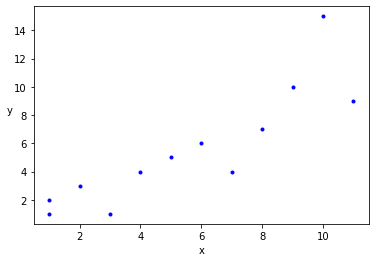

In [6]:
plt.plot(x,y,'b.')
plt.xlabel("x", fontsize=10)
plt.ylabel("y", rotation=0, fontsize=10)

In [7]:
def  calculateCost(theta,x,y):
    m = len(y)
    
    predicted = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predicted-y))
    return cost


In [8]:
def gradient_descent(x,y,theta,rate=0.01,iterations=100):
    m = len(y)
    costMatrix = np.zeros(iterations)
    thetaMatrix = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(x,theta)
        
        theta = theta -(1/m)*rate*( x.T.dot((prediction - y)))
        thetaMatrix[it,:] =theta.T
        costMatrix[it]  = calculateCost(theta,x,y)
        
    return theta, costMatrix, thetaMatrix

In [9]:
x=np.array(x)
x=np.reshape(x, (len(x), 1))
x=np.array(y)
y=np.reshape(y, (len(y), 1))


In [10]:
rate =0.01
iterations = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(x),1)),x]

theta,costMatrix,thetaMatrix = gradient_descent(X_b,y,theta,rate,iterations)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(costMatrix[-1]))

Theta0:          -0.017,
Theta1:          1.002
Final cost/MSE:  0.007


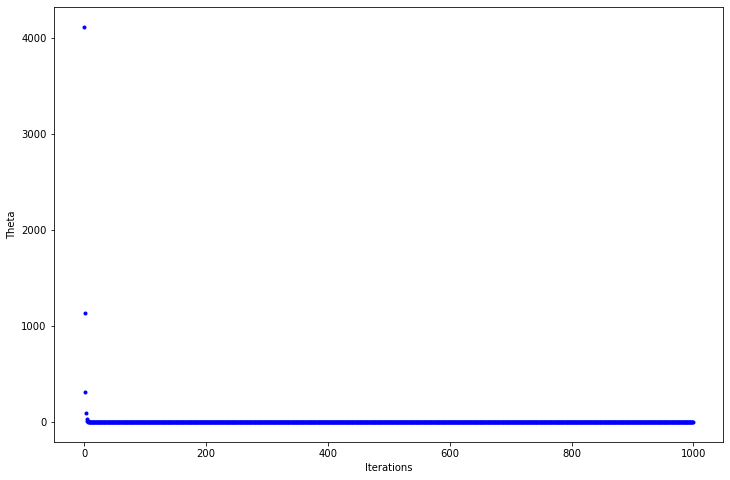

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),costMatrix,'b.')

In [15]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calculateCost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


In [16]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -641248370.282,
Theta1:          2667077102.593
Final cost/MSE:  3034931235242555998208.000


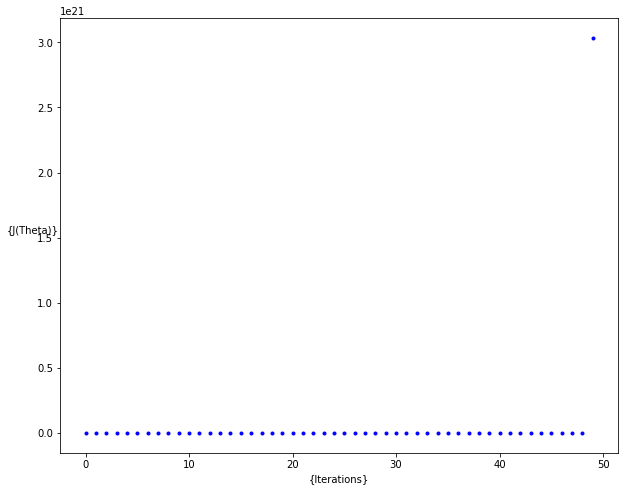

In [17]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [32]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calculateCost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


In [33]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(x,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -897295973698241770439648377304625592410740616848933777361986357077401942455798706743956766235871783360048262021120.000,
Theta1:          -7486796282518621819598761998877420737107786913175301353697851454487968482180108671519107749930578918698016644792320.000
Final cost/MSE:  194803195850948319312328172696922588903902106105948427803743816277506869250308981694694751447540839507833347757993645352067654435476688081703121563308467507827526626470227905977698100341020285756403097752987848142292784310531190161408.000


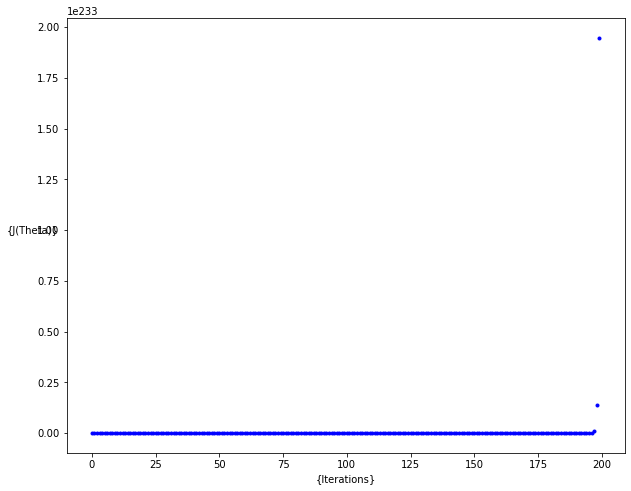

In [34]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')